# Style Transfer using [GoMLX](github.com/gomlx/gomlx), a mchine learning framework for Go

Based on [1], the seminal paper on the topic. With some help of the blog post [2]. But it uses the InceptionV3 image model instead of the VGG-19 for style transfer.

All the code is in the repository [github.com/janpfeifer/styletransfer/styletransfer](https://github.com/janpfeifer/styletransfer/styletransfer),
it's only about 400 lines of code, including I/O code (loading and displaying the images).

* [1] "A Neural Algorithm of Artistic Style", 2015, Gatys, Ecker & Bethge -- https://arxiv.org/abs/1508.06576
* [2] "Neural Style Transfer (NST) -- theory and implementation", 2021 -- https://medium.com/@ferlatti.aldo/neural-style-transfer-nst-theory-and-implementation-c26728cf969d

There are still tons that can be improved:

* Other style losses.
* Work with higher resolution images.
* Work with videos.
* Style transfer with forward pass only.
* Read and implement newest papers...

### Local redirects (to use the local code) and imports

In [1]:
!*rm -f go.work && go work init && go work use . "${HOME}/Projects/styletransfer" "${HOME}/Projects/gomlx"
%goworkfix

	- Added replace rule for module "github.com/janpfeifer/styletransfer" to local directory "/home/janpf/Projects/styletransfer".
	- Added replace rule for module "github.com/gomlx/gomlx" to local directory "/home/janpf/Projects/gomlx".


In [7]:
import (
    . "github.com/gomlx/gomlx/graph"
    "github.com/gomlx/gomlx/backends"
    _ "github.com/gomlx/gomlx/backends/xla"
    "github.com/gomlx/gomlx/ml/context"
    "github.com/gomlx/gomlx/ml/train/optimizers"
    "github.com/gomlx/gomlx/types/tensors"
    "github.com/gomlx/gomlx/types/tensors/images"
    "github.com/janpfeifer/gonb/gonbui"
    "github.com/janpfeifer/must"
    "github.com/janpfeifer/styletransfer/styletransfer"
)

var (
    // GoMLX backend used everywhere.
    backend = backends.New()

    // dir is the directory with our test images.
    imgDir = "./tmp/"
    
    // Just so that the `import . gomlx/graph` doesn't complain it's not in use.
    _ *Node = nil
)

### Loading and Displaying Images

Just to test everything is working.

Images:
- original:	(Float32)[768 768 3]
- style:   	(Float32)[645 962 3]
	> Scaled to (Float32)[299 299 3]



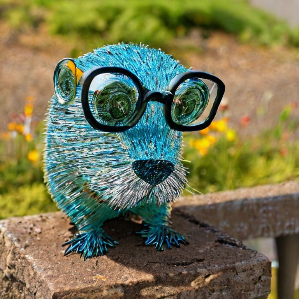
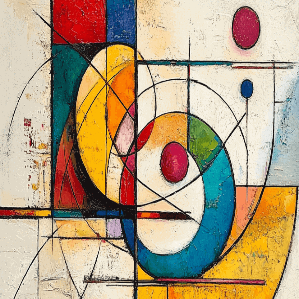

In [9]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"gomlx_gopher.jpg", imgDir+"style3.png")
styletransfer.DisplayImages(original, style)

### Style Transfer Examples

Using various images and styles downloaded from the internet.

Images:
- original:	(Float32)[768 768 3]
- style:   	(Float32)[645 962 3]
	> Scaled to (Float32)[299 299 3]
Style transferring: step=03000 of 03000 ( 28.0ms/step) -- loss=float32(45.69)			  		          



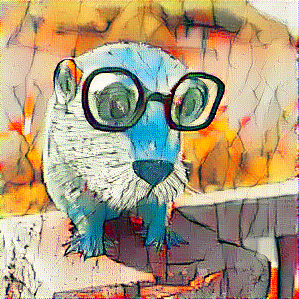
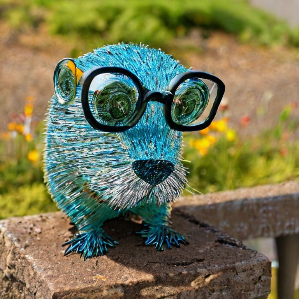
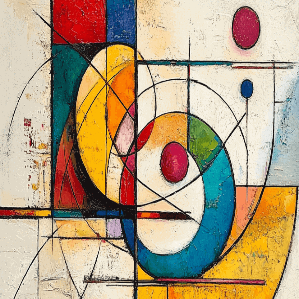

In [10]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"gomlx_gopher.jpg", imgDir+"style3.png")
target := styletransfer.New(backend, context.New(), original, style).NumSteps(3_000).Transfer()
styletransfer.DisplayImages(target, original, style)

Images:
- original:	(Float32)[2048 2048 3]
- style:   	(Float32)[565 848 3]
	> Scaled to (Float32)[299 299 3]
step=02999, loss=float32(28.74)                  



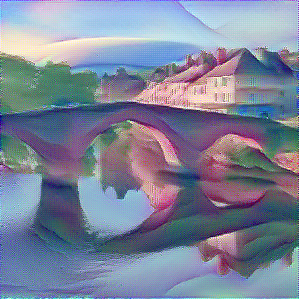
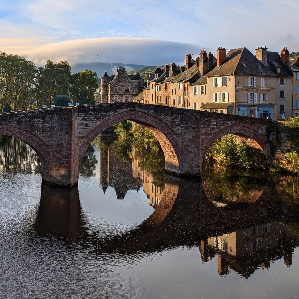
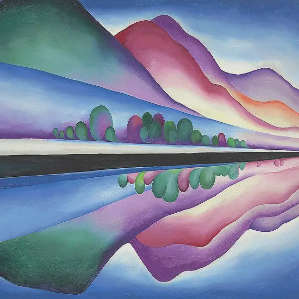

In [16]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"france.png", imgDir+"style4.webp")
target := styletransfer.New(backend, context.New(), original, style).NumSteps(3_000).Transfer()
styletransfer.DisplayImages(target, original, style)

Images:
- original:	(Float32)[2048 2048 3]
- style:   	(Float32)[814 848 3]
	> Scaled to (Float32)[299 299 3]
step=01999, loss=float32(24.06)              



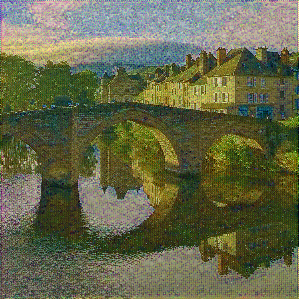
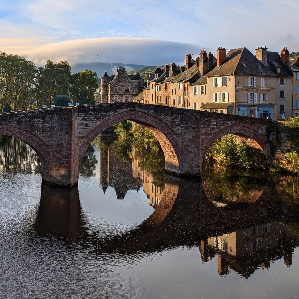
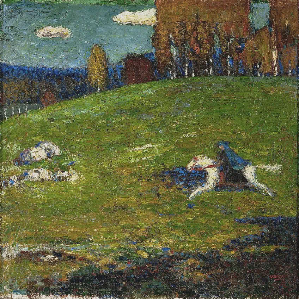

In [18]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"france.png", imgDir+"style6.webp")
target := styletransfer.New(backend, context.New(), original, style).NumSteps(2_000).Transfer()
styletransfer.DisplayImages(target, original, style)

Images:
- original:	(Float32)[2048 2048 3]
- style:   	(Float32)[2160 2728 3]
	> Scaled to (Float32)[299 299 3]
Style transferring: step=10000 of 10000 ( 36.5ms/step) -- loss=float32(1.496)			  			  



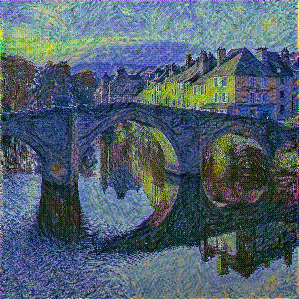
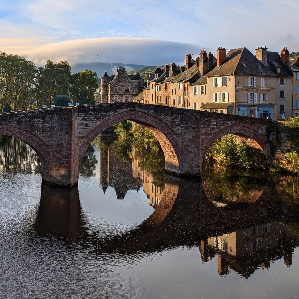
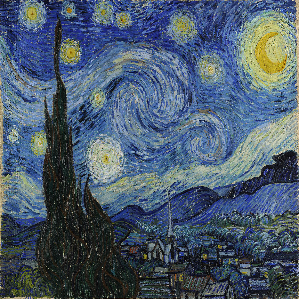

In [23]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"france.png", imgDir+"style.png")
target := styletransfer.New(backend, context.New(), original, style).NumSteps(10_000).Transfer()
styletransfer.DisplayImages(target, original, style)

Images:
- original:	(Float32)[2048 2048 3]
- style:   	(Float32)[671 848 3]
	> Scaled to (Float32)[299 299 3]
step=05000 of 05000, loss=float32(6.291), avg_time_per_step=36.3s			    		  



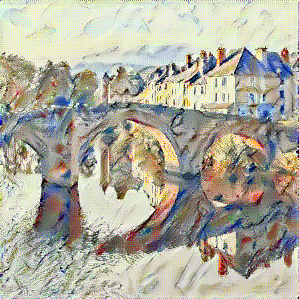
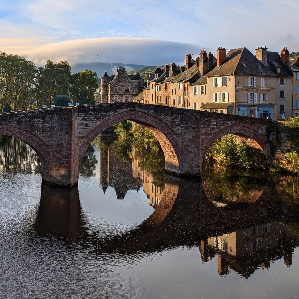
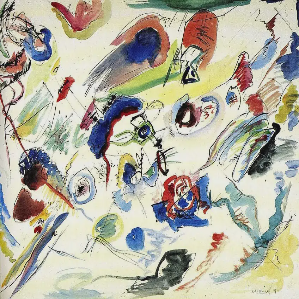

In [20]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"france.png", imgDir+"style5.webp")
target := styletransfer.New(backend, context.New(), original, style).NumSteps(5_000).Transfer()
styletransfer.DisplayImages(target, original, style)

Images:
- original:	(Float32)[2079 2079 3]
- style:   	(Float32)[867 848 3]
	> Scaled to (Float32)[299 299 3]
step=04987 of 05000 ( 36.4ms/step) -- loss=float32(2.481)			  



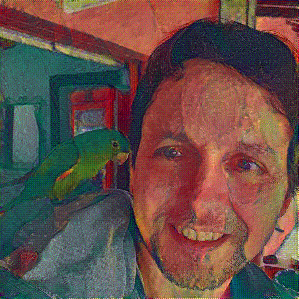
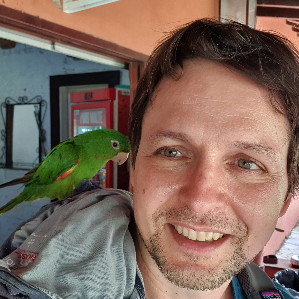
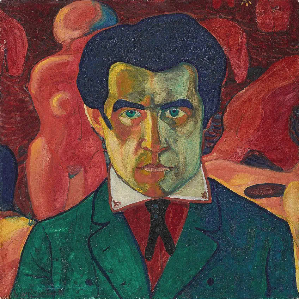

In [22]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"profile_parrot.jpg", imgDir+"style7.webp")
target := styletransfer.New(backend, context.New(), original, style).NumSteps(5_000).Transfer()
styletransfer.DisplayImages(target, original, style)

Images:
- original:	(Float32)[3008 3008 3]
- style:   	(Float32)[1175 1200 3]
	> Scaled to (Float32)[299 299 3]
Style transferring: step=02000 of 02000 ( 27.0ms/step) -- loss=float32(17.43)			  		           



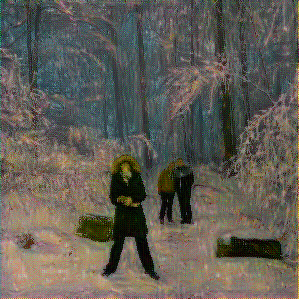
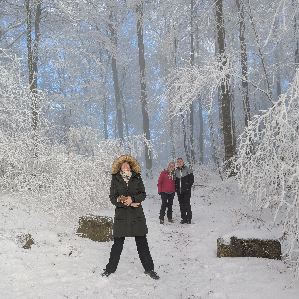
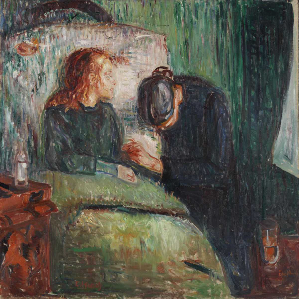

In [24]:
%%
original, style := styletransfer.LoadScaledImages(backend, imgDir+"christmas.jpg", imgDir+"style8.jpg")
target := styletransfer.New(backend, context.New(), original, style).NumSteps(2_000).Transfer()
styletransfer.DisplayImages(target, original, style)